In [ ]:
# 情境：輸入不同channel圖片

In [4]:

import tensorflow as tf
mnist = tf.keras.datasets.mnist
# 匯入RPG 花圖片
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True) 
data_dir = pathlib.Path(data_dir)
training = tf.keras.preprocessing.image_dataset_from_directory( 
  data_dir, 
  validation_split=0.2, 
  subset="training", 
  seed=123,
  image_size=(28, 28))
y_train = training.class_names
x_train=training


testing = tf.keras.preprocessing.image_dataset_from_directory( 
  data_dir, 
  validation_split=0.2, 
  subset="validation", 
  seed=123,
  image_size=(28, 28))
y_test = testing.class_names
x_test=testing
input_shape=(28,28,3) 
print(type(x_train),"\n")
print(x_train,"\n")

print("----------------------","\n")

# 匯入 MNIST 手寫阿拉伯數字 訓練灰階圖片
# (x_train, y_train),(x_test, y_test) = mnist.load_data()
# # 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# # 顏色範圍：0~255，所以，公式簡化為 x / 255
# x_train, x_test = x_train / 255.0, x_test / 255.0
# input_shape=(28,28,1) # 等於(28,28)
# print(type(x_train),"\n")
# print(x_train.shape,"\n")

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'> 

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> 

---------------------- 



In [5]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=input_shape),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train, epochs=5)
# model.fit(x_train, y_train, epochs=1)


# 模型評估，打分數
model.evaluate(testing)
# model.evaluate(x_test, y_test)

Epoch 1/5


2022-05-11 00:09:41.101362: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-11 00:09:41.101418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


92/92 [==============================] - 1s 11ms/step - loss: 68.4325 - accuracy: 0.2340
Epoch 2/5
92/92 [==============================] - 1s 10ms/step - loss: 2.2540 - accuracy: 0.2381
Epoch 3/5
92/92 [==============================] - 1s 10ms/step - loss: 2.1667 - accuracy: 0.2507
Epoch 4/5
92/92 [==============================] - 1s 10ms/step - loss: 2.0784 - accuracy: 0.2517
Epoch 5/5
 6/23 [======>.......................] - ETA: 0s - loss: 2.0152 - accuracy: 0.2083

2022-05-11 00:09:46.287567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 8ms/step - loss: 2.0186 - accuracy: 0.2411


[2.0186164379119873, 0.24114440381526947]

['loss', 'accuracy']


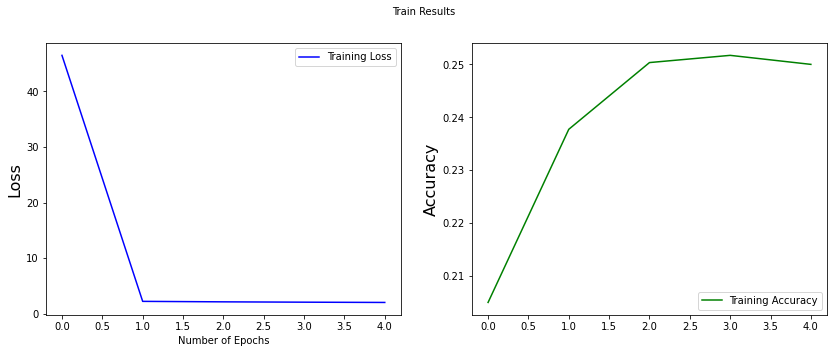

In [8]:
import matplotlib.pyplot as plt
print(list(history.history))
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.legend(loc='lower right')
plt.show()